# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from sklearn.linear_model import LinearRegression

In [ ]:
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (11, 7)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Verdana', 'DejaVu Sans']
plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams.keys()

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Constantes

In [ ]:
g = 9.78
Δg = 0.05

# Database

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSVs/dados.csv', encoding='utf-8')

In [ ]:
df

,# de Pesos,m,Δm,P,ΔP,x1,Δx1,xs,Δxs,xp,Δxp
0,0,0.00,0.0001,0.000,0.001,0.0000,0.0005,0.0000,0.0005,0.0000,0.0005
1,1,0.04,0.0001,0.391,0.002,0.0190,0.0005,0.0410,0.0005,0.0130,0.0005
2,2,0.08,0.0001,0.782,0.004,0.0365,0.0005,0.0840,0.0005,0.0220,0.0005
3,3,0.12,0.0001,1.174,0.006,0.0530,0.0005,0.1205,0.0005,0.0295,0.0005
4,4,0.16,0.0001,1.565,0.008,0.0725,0.0005,0.1575,0.0005,0.0410,0.0005
5,5,0.20,0.0001,1.956,0.010,0.0925,0.0005,0.2050,0.0005,0.0510,0.0005
6,6,0.24,0.0001,2.347,0.012,0.1120,0.0005,0.2555,0.0005,0.0570,0.0005
7,7,0.28,0.0001,2.738,0.014,0.1290,0.0005,0.2815,0.0005,0.0700,0.0005


# Gráficos

A x1: 21.1115
B x1: 0.0114

A xs: 9.5205
B xs: 0.0065

A xp: 40.4668
B xp: -0.0649



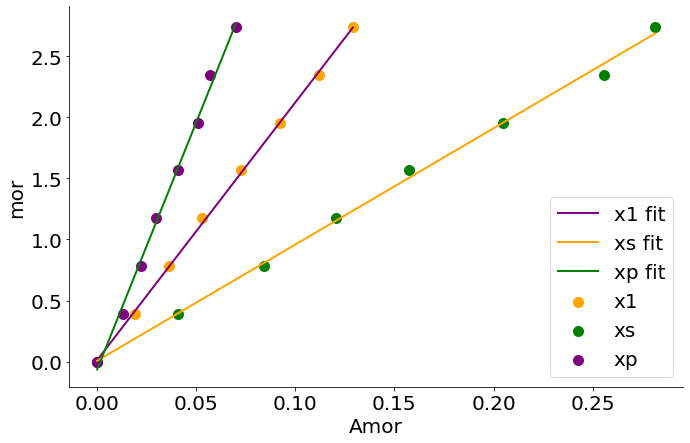

In [ ]:
colx = ['x1', 'xs', 'xp']
coly = 'P'

# color = iter(cm.rainbow(np.linspace(0, 1, len(coly) * 3)))

color = ['purple', 'orange', 'green']

y = df[[coly]]

for i in range(len(colx)):
    X = df[[colx[i]]]
    linear = LinearRegression(fit_intercept=True)
    linear = linear.fit(X, y)

    y_hat = linear.predict(X)

    plt.plot(X, y_hat, color=color[i % 3], label=colx[i] + ' fit')
    print('A ' + colx[i] + ':', np.round(linear.coef_[0][0], 4))
    print('B ' + colx[i] + ':', np.round(linear.intercept_[0], 4))
    print()

    plt.scatter(X, y, color=color[(i + 1) % 3], label=colx[i])

plt.xlabel('Amor')
plt.ylabel('mor')

plt.legend()

despine()

plt.show()

# Regressão

## Funções

In [ ]:
# def predict(alpha, beta, x):
#     return alpha + beta * x

# def error(alpha, beta, x, y):
#     return y - predict(alpha, beta, x)

# def sse(alpha, beta, x, y):
#     err += np.sum(error(alpha, beta, x, y) ** 2)
#     return err

# def var(x):
#     n = len(x)
    
#     x_mean = np.mean(x)
    
#     return np.sum((x - x_mean) ** 2) / (n - 1)

# def cov(x, y):
#     n = len(x)
    
#     x_mean = np.mean(x)
#     y_mean = np.mean(y)
    
#     return np.sum((x - x_mean) * (y - y_mean)) / (n - 1)

# def least_squares_fit(x, y):
#     covxy = cov(x, y)
#     varx = var(x)

#     beta = covxy / varx

#     alpha = np.mean(y) - beta * np.mean(x)

#     return alpha, beta

In [ ]:
def predict(alpha, beta, x):
    return alpha + beta * x

def error(alpha, beta, x, y):
    return y - predict(alpha, beta, x)

def sse(alpha, beta, x, y):
    err = np.sum(error(alpha, beta, x, y) ** 2)
    return err

def least_squares_fit(x, y):
    covxy = np.cov(x, y, ddof=1)[0][1]
    varx = np.var(x, ddof=1)

    beta = covxy / varx

    alpha = np.mean(y) - beta * np.mean(x)

    return alpha, beta

def u_ab(x, ssquares):
    n = len(x)

    p1 = ssquares / (n - 2)

    xssquares = np.sum(x ** 2)
    
    p2_num = xssquares
    p2_den = n * xssquares - xssquares

    p2 = np.sqrt(p2_num / p2_den)

    u_a = p1 * p2
    
    num = ssquares

    den_p1 = n - 2
    den_p2 = n * xssquares - xssquares

    den = den_p1 * np.sqrt(den_p2)

    u_b = num / den

    return u_a, u_b

## Valores

### Comparação

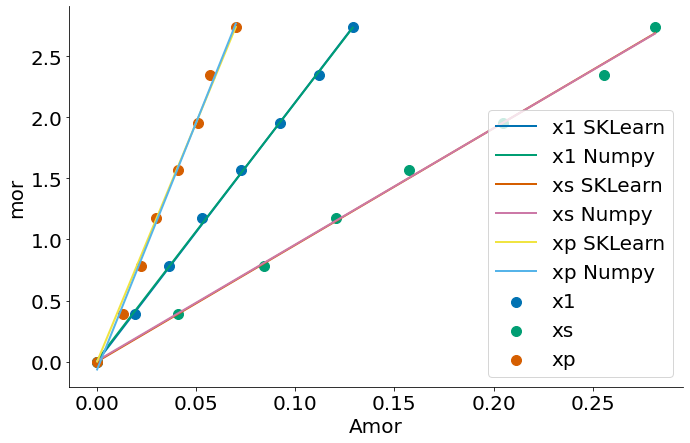

In [ ]:
# colx = ['x1', 'xs', 'xp']
# coly = 'P'

# Y = df[[coly]]
# y = df[coly]

# for i in range(len(colx)):
#     X = df[[colx[i]]]
#     x = df[colx[i]]
#     linear = LinearRegression(fit_intercept=False)
#     linear = linear.fit(X, Y)

#     y_hat = linear.predict(X)

#     plt.plot(X, y_hat, label=colx[i] + ' SKLearn')

#     alpha, beta = least_squares_fit(x, y)

#     y_hat = predict(alpha, beta, x)

#     plt.plot(x, y_hat, label=colx[i] + ' Numpy')

#     # print('SKLearn:')
#     # print('A ' + colx[i] + ':', np.round(linear.coef_[0][0], 4))
#     # print('B ' + colx[i] + ':', np.round(linear.intercept_, 4))
#     # print()

#     # print('Numpy:')
#     # print('A ' + colx[i] + ':', np.round(beta, 4))
#     # print('B ' + colx[i] + ':', np.round(alpha, 4))
#     # print()

#     plt.scatter(X, Y, label=colx[i])

# plt.xlabel('Amor')
# plt.ylabel('mor')

# plt.legend()

# despine()

# plt.show()

In [ ]:
# colx = ['x1', 'xs', 'xp']
# coly = 'P'

# Y = df[[coly]]
# y = df[coly]

# for i in range(len(colx)):
#     X = df[[colx[i]]]
#     x = df[colx[i]]
#     linear = LinearRegression(fit_intercept=True)
#     linear = linear.fit(X, Y)

#     alpha, beta = least_squares_fit(x, y)

#     print('SKLearn:')
#     print('A ' + colx[i] + ':', np.round(linear.coef_[0][0], 4))
#     print('B ' + colx[i] + ':', np.round(linear.intercept_[0], 4))
#     print()

#     print('Numpy:')
#     print('A ' + colx[i] + ':', np.round(beta, 4))
#     print('B ' + colx[i] + ':', np.round(alpha, 4))
#     print()

SKLearn:
A x1: 21.1115
B x1: 0.0114

Numpy:
A x1: 21.1115
B x1: 0.0114

SKLearn:
A xs: 9.5205
B xs: 0.0065

Numpy:
A xs: 9.5205
B xs: 0.0065

SKLearn:
A xp: 40.4668
B xp: -0.0649

Numpy:
A xp: 40.4668
B xp: -0.0649



### Continuação

In [ ]:
colx = ['x1', 'xs', 'xp']
coly = 'P'

y = df[coly]

for i in range(len(colx)):
    X = df[colx[i]]

    alpha, beta = least_squares_fit(X, y)

    print('A ' + colx[i] + ':', np.round(beta, 4))
    print('B ' + colx[i] + ':', np.round(alpha, 4))
    print()

A x1: 21.1115
B x1: 0.0114

A xs: 9.5205
B xs: 0.0065

A xp: 40.4668
B xp: -0.0649



In [ ]:
# B = -0.001527 +/- 0.0009388
# A = 21.31 +/- 0.04532

# B = -0.000336 +/- 0.0009378
# A = 9.559 +/- 0.02034

# B = -0.01475 +/- 0.0009521
# A = 37.27 +/- 0.07973

In [ ]:
coly = ['x1', 'xs', 'xp']
colx = 'P'

X = df[colx]

for i in range(len(coly)):
    y = df[coly[i]]

    alpha, beta = least_squares_fit(X, y)

    print('A ' + coly[i] + ':', np.round(beta, 4))
    print('B ' + coly[i] + ':', np.round(alpha, 4))
    print()

A x1: 0.0473
B x1: -0.0005

A xs: 0.1048
B xs: -0.0003

A xp: 0.0246
B xp: 0.0018



In [ ]:
# B = -0.0004997 +/- 0.0003227
# A = 0.04734 +/- 0.0001972

# B = -0.0003327 +/- 0.0003227
# A = 0.1048 +/- 0.0001972

# B = 0.00175 +/- 0.0003227
# A = 0.0246 +/- 0.0001972

In [ ]:
colx = ['x1', 'xs', 'xp']
coly = 'P'

y = df[coly].values

for i in range(len(colx)):
    X = df[[colx[i]]].values
    x = df[colx[i]].values
    linear = LinearRegression(fit_intercept=True)
    linear = linear.fit(X, y)

    ssquares = np.sum((y - linear.predict(X)) ** 2)
    
    ua_, ub_ = u_ab(X, ssquares)

    print('SKLearn:')
    print('A ' + colx[i] + ':', '(' + str(np.round(linear.coef_[0], 4)), '±', str(np.round(ua_, 4)) + ')')
    print('B ' + colx[i] + ':', '(' + str(np.round(linear.intercept_, 4)), '±', str(np.round(ub_, 4)) + ')')
    print()

    alpha, beta = least_squares_fit(x, y)

    ssquares = sse(alpha, beta, x, y)
    
    ua_, ub_ = u_ab(x, ssquares)

    print('Numpy:')
    print('A ' + colx[i] + ':', '(' + str(np.round(beta, 4)), '±', str(np.round(ua_, 4)) + ')')
    print('B ' + colx[i] + ':', '(' + str(np.round(alpha, 4)), '±', str(np.round(ub_, 4)) + ')')
    print()

SKLearn:
A x1: (21.1115 ± 0.0002)
B x1: (0.0114 ± 0.0011)

Numpy:
A x1: (21.1115 ± 0.0002)
B x1: (0.0114 ± 0.0011)

SKLearn:
A xs: (9.5205 ± 0.001)
B xs: (0.0065 ± 0.002)

Numpy:
A xs: (9.5205 ± 0.001)
B xs: (0.0065 ± 0.002)

SKLearn:
A xp: (40.4668 ± 0.0017)
B xp: (-0.0649 ± 0.0148)

Numpy:
A xp: (40.4668 ± 0.0017)
B xp: (-0.0649 ± 0.0148)

